<h1>Zamato Data Analysis</h1>

<h2>Step 1 : Importing Libraries</h2>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns 

In [15]:
# import the data  and Create the data Frame
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [23]:
# Convert the Data Type of Column - Rate 
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value) 
dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe.head()
dataframe.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type OF Resturant ')

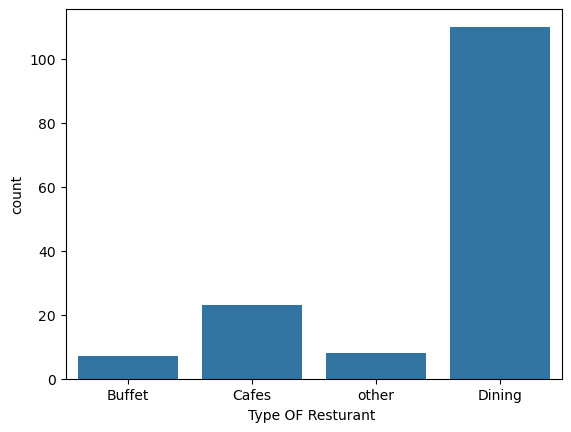

In [59]:
# Q1 What type of restaurant do the majority of customers order from?
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type OF Resturant ")

Text(0, 0.5, 'Resturant Votes ')

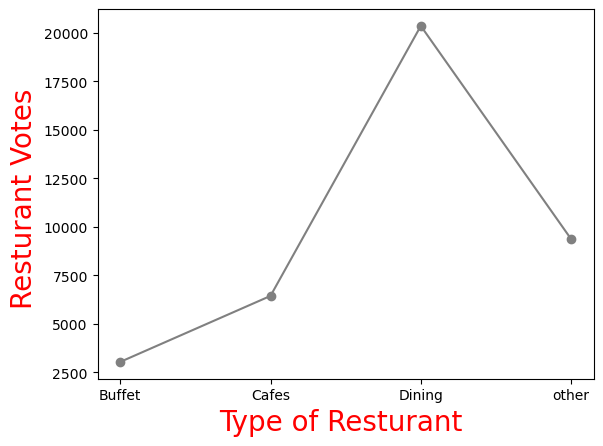

In [63]:
# Q2 :  How many votes has each type of restaurant received from customers?
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result , c='gray' , marker='o')
plt.xlabel("Type of Resturant " , c='red' , size =20)
plt.ylabel("Resturant Votes " , c='red' , size =20)

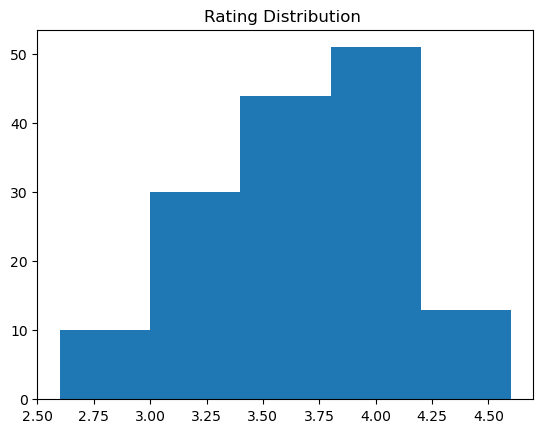

In [75]:
# Q3 : What are the ratings that the majority of restaurants have received?
plt.hist(dataframe['rate'], bins=5 )
plt.title("Rating Distribution ")
plt.show()

C:\Users\Engr Noman Mahmood\AppData\Local\Temp\ipykernel_10388\475347928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data , palette="viridis")


<Axes: xlabel='Couple Oder Cost', ylabel='count'>

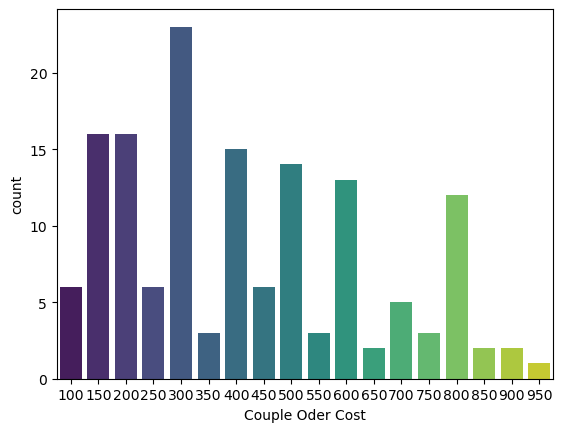

In [81]:
# 4)Zomato has observed that most couples order most of their food online. What is their
average spending on each order?
couple_data = dataframe['approx_cost(for two people)']
plt.xlabel("Couple Oder Cost")
sns.countplot(x=couple_data , palette="viridis")

C:\Users\Engr Noman Mahmood\AppData\Local\Temp\ipykernel_10388\3387250439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="online_order" , y="rate" , data=dataframe ,  palette="viridis")


Text(0.5, 0, 'Order Online or Offline ')

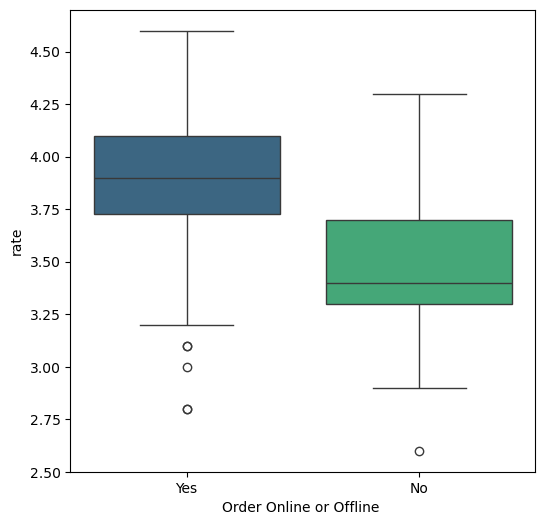

In [89]:
# 5) Which mode (online or offline) has received the maximum rating?
plt.figure(figsize = (6,6))
sns.boxplot(x="online_order" , y="rate" , data=dataframe ,  palette="viridis")
plt.xlabel("Order Online or Offline ")

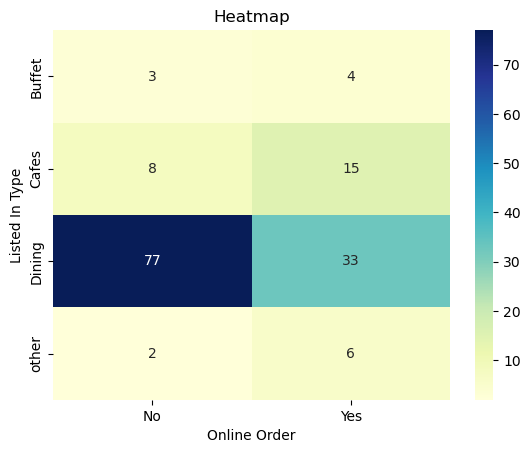

In [95]:
# 6) Which type of restaurant received more offline orders, so that Zomato can provide those
customers with some good offers?
pivot_table = dataframe.pivot_table(index= 'listed_in(type)' , columns = 'online_order' , aggfunc= 'size' , fill_value=0)
sns.heatmap(pivot_table , annot=True , cmap="YlGnBu" , fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In Type")
plt.show()
    